# TP 2. PARTIE 1. scikit-learn + Naive Bayes

Le module de Machine Learning en Python : scitkit-learn (sklearn)
http://scikit-learn.org/stable/

## Plan :

   [- Iris dataset](#1)
   
   [- Naive Bayes](#2)
   
   [- Mon Naive Bayes](#3)
   
   [- Tests](#4)

http://scipy-lectures.org/advanced/scikit-learn/

In [31]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

# 1. Iris dataset


On va chercher le dataset **iris** dans le module sklearn

In [32]:
from sklearn import datasets
iris = datasets.load_iris()

1) Analyser les résultats des commandes suivantes:

In [33]:
type(iris)

sklearn.utils.Bunch

In [34]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [10]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [35]:
type(iris.data)

numpy.ndarray

In [36]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [37]:
type(iris.target)

numpy.ndarray

The class of each observation is stored in the .target attribute of the dataset

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 2. Naive Bayes


In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(BaseNB)
 |  Gaussian Naive Bayes (GaussianNB)
 |  
 |  Can perform online updates to model parameters via `partial_fit` method.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like, shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  Attributes
 |  ----------
 |  class_prior_ : array, shape (n_classes,)
 |      probability of each class.
 |  
 |  class_count_ : array, shape (n_classes,)
 |      number of training samples observed in each class.
 |  
 |  theta_ : array, shape (n_classes, n_features)
 |      mean of eac

In [41]:
gnb = GaussianNB()
help(gnb.fit)

Help on method fit in module sklearn.naive_bayes:

fit(X, y, sample_weight=None) method of sklearn.naive_bayes.GaussianNB instance
    Fit Gaussian Naive Bayes according to X, y
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples
        and n_features is the number of features.
    
    y : array-like, shape (n_samples,)
        Target values.
    
    sample_weight : array-like, shape (n_samples,), optional (default=None)
        Weights applied to individual samples (1. for unweighted).
    
        .. versionadded:: 0.17
           Gaussian Naive Bayes supports fitting with *sample_weight*.
    
    Returns
    -------
    self : object
        Returns self.



On donne ici un exemple d'utilisation du Naive Bayes:

In [45]:
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total   points : %d"
       % (iris.data.shape[0],(iris.target != y_pred).sum()))


TypeError: not all arguments converted during string formatting

In [43]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1]:
(iris.target != y_pred).sum()

NameError: name 'iris' is not defined

In [16]:
gnb.fit(iris.data, iris.target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

2) On sépare en 2 parties égales le dataset avec tirage aléatoire sans remise

In [46]:
train = np.random.choice(range(150), 75, replace=False)
train

array([ 95,  26, 139, 122,  41,  57,  77,  70, 111,  88,  58, 128, 143,
       135, 105,  72, 123,  65, 118,  87,  67, 104,  15,  42,  49,  56,
       114, 103, 138,   5,  45,  35,  18, 124,  43,  13, 140,  82, 149,
         3,  75,  29,  16,  12, 137,  11, 126,  97,   8,  94, 125, 142,
        99,  47, 106, 109,  39,  71,   1,  93,  80, 132,   4,  96,  53,
        60, 107,  33, 116,  54,   7,  52,  31,  19,  63])

In [47]:
test = np.delete(range(150), train)
test

array([  0,   2,   6,   9,  10,  14,  17,  20,  21,  22,  23,  24,  25,
        27,  28,  30,  32,  34,  36,  37,  38,  40,  44,  46,  48,  50,
        51,  55,  59,  61,  62,  64,  66,  68,  69,  73,  74,  76,  78,
        79,  81,  83,  84,  85,  86,  89,  90,  91,  92,  98, 100, 101,
       102, 108, 110, 112, 113, 115, 117, 119, 120, 121, 127, 129, 130,
       131, 133, 134, 136, 141, 144, 145, 146, 147, 148])

Puis on regarde le résutat sur la prédiction

In [48]:
y_pred = gnb.fit(iris.data[train,], iris.target[train,]).predict(iris.data[test,])
100*(iris.target[test,] != y_pred).sum()/len(test)


4.0

3) Construire une fonction NB de paramètre A, B et nb qui répète nb tirages aléatoires avec i données pour la partie apprentissage et 150-i pour le test avec i allant de A à B. La fonction renvoie une liste de taille B-A+1 avec le pourcentage de prédiction exacte sur les données de test.

In [21]:
np.random.choice(range(150), 5, replace=False)

array([ 86,  99,  52,  65, 143])

In [22]:
def NB(A,B,nb):
    res = []
    for i in range(A,B+1):
        temp = 0
        for j in range(nb):
            train = np.random.choice(range(150), i, replace=False)
            test = np.delete(range(150), train)
            y_pred = gnb.fit(iris.data[train,], iris.target[train,]).predict(iris.data[test,])
            temp = temp + 100*(iris.target[test,] != y_pred).sum()/len(test)
        res = res + [temp/nb]
    return res
NB(2,30,3)


[48.648648648648646,
 47.61904761904763,
 54.337899543378995,
 46.20689655172415,
 51.15740740740741,
 45.68764568764569,
 41.07981220657277,
 33.333333333333336,
 22.14285714285714,
 23.02158273381295,
 6.763285024154588,
 35.523114355231144,
 9.068627450980392,
 27.160493827160494,
 8.457711442786069,
 17.79448621553885,
 5.808080808080809,
 4.8346055979643765,
 8.461538461538462,
 13.953488372093025,
 9.635416666666666,
 9.186351706036746,
 6.613756613756614,
 6.933333333333333,
 5.645161290322581,
 5.420054200542005,
 7.923497267759562,
 6.06060606060606,
 7.500000000000001]

4) Tracer sur un graphique le vecteur NB(A,B,10) avec A = 2 et B = 149

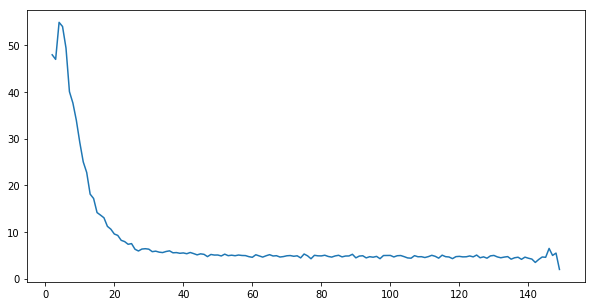

In [23]:
A = 2
B = 149
plt.figure(figsize=(10,5))
plt.plot(np.linspace(A,B,B-A+1), NB(A,B,100));

# 3. Mon Naive Bayes

5) Si Bayes est si naif que ça, pourquoi pas le construire nous-même ! En s'aidant du cours, construire la fonction MonNaiveBayes sur le modèle suivant

In [114]:
data_train=iris.data[train,]
print(data_train.shape)
target_train=iris.target[train,]
id_y0=np.where(target_train==0)
id_y0
np.sum(len())

(75, 4)


TypeError: len() takes exactly one argument (0 given)

In [52]:
data_train[id_y0].shape

(25, 4)

In [53]:
np.mean(data_train[id_y0], axis=1)

array([ 2.6  ,  2.1  ,  3.   ,  2.275,  2.475,  2.85 ,  2.375,  2.4  ,
        2.875,  2.675,  2.125,  2.35 ,  2.425,  2.75 ,  2.325,  2.5  ,
        2.225,  2.35 ,  2.55 ,  2.375,  2.55 ,  2.825,  2.525,  2.675,
        2.675])

In [54]:
np.std(data_train[id_y0], axis=1)

array([ 1.74928557,  1.55563492,  2.13658606,  1.62999233,  1.82944664,
        1.93196791,  1.69760861,  1.8493242 ,  2.05228531,  1.69908063,
        1.63152536,  1.65604952,  1.68874954,  1.99812412,  1.75979402,
        1.74642492,  1.57856739,  1.68151717,  1.86077941,  1.76405074,
        1.86748494,  2.1194044 ,  1.82671153,  1.90443561,  1.88198698])

In [58]:
data_train[id_y0].shape[1]/data_train.shape[0]

0.05333333333333334

In [56]:
data_train[id_y0].shape[1]

4

In [59]:
data_train.shape[0]

75

    """
    x: valeur à laquelle sera évaluée delta, np.array  size d
    mu_hat: moyenne des features, np.array size d
    sigma_hat: std des features, np.array size d
    pi_hat: proportion parmi le train, np.float
    """

In [128]:
def delta(x,mu_hat,sigma_hat,pi_hat):
    d=x.shape[0]
    log_density_features=-d * np.log(np.sqrt(2*np.pi)) -np.sum(np.log(sigma_hat))-np.sum((x-mu_hat)**2/(2*sigma_hat**2),axis=1)
    log_proba= np.log(pi_hat)
    return log_density_features+log_proba
    

In [90]:
x=np.array([1.2,2.1,-1.5,-1])
print(x.shape[0])
d=x.shape[0]
mu_hat0=np.mean(data_train[id_y0,],axis=1)
sigma_hat0=np.std(data_train[id_y0,],axis=1)
pi_hat0=data_train[id_y0,].shape[1]/data_train.shape[0]


id_y1=np.where(target_train==1)
mu_hat1=np.mean(data_train[id_y1,],axis=1)
sigma_hat1=np.std(data_train[id_y1,],axis=1)
pi_hat1=data_train[id_y1,].shape[1]/data_train.shape[0]

id_y2=np.where(target_train==2)
mu_hat2=np.mean(data_train[id_y2,],axis=1)
sigma_hat2=np.std(data_train[id_y2,],axis=1)
pi_hat2=data_train[id_y2,].shape[1]/data_train.shape[0]


4


In [91]:
delta(x,mu_hat0,sigma_hat0,pi_hat0)

-330.08352147982902

In [92]:
delta(x,mu_hat1,sigma_hat1,pi_hat1)

-182.15158253229518

In [93]:
delta(x,mu_hat2,sigma_hat2,pi_hat2)

-190.40613176511656

In [101]:
x=data_train[0:3,:]
x

array([[ 5.7,  3. ,  4.2,  1.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 6.9,  3.1,  5.4,  2.1]])

In [102]:
mu_hat0

array([[ 4.964,  3.38 ,  1.448,  0.264]])

In [104]:
np.sum((x-mu_hat0)**2/(2*sigma_hat0**2),axis=1)

array([ 225.1168704 ,    1.30821049,  534.13536301])

aqui cambia, trabajo con x una matriz, entonces aumento axis=1

In [ ]:
target_values=np.unique(target_label)
n,d=train_features.shape
#mu_hat=np.zeros((target_values.shape[0],d))
#sigma_hat=np.zeros((target_values.shape[0],d))
#pi_hat=np.zeros((target_values.shape[0]))
mu_hat=[]
sigma_hat=[]
pi_hat=[]
"""
for y in np.unique(target_train):
    print(y)
    id_y1=np.where(target_train==y)
    mu_hat[k,:]=np.mean(data_train[id_y,],axis=1)
    sigma_hat[k,:]=np.std(data_train[id_y,],axis=1)
    pi_hat[k]=data_train[id_y1,].shape[1]/data_train.shape[0]
    k+=1
print(mu_hat)
"""
for y in np.unique(target_train):
    print(y)
    id_y1=np.where(target_train==y)
    mu_hat.append=np.mean(data_train[id_y,],axis=1)
    sigma_hat.append=np.std(data_train[id_y,],axis=1)
    pi_hat.append=data_train[id_y1,].shape[1]/data_train.shape[0]
print(mu_hat)

[]

In [94]:
def MonNaiveBayes(train_features, train_label,test_features):
    target_values=np.unique(train_label)
    n,d=train_features.shape
    mu_hat=[]
    sigma_hat=[]
    pi_hat=[]
    for y in np.unique(target_train):
        print(y)
        id_y1=np.where(target_train==y)
        mu_hat.append=np.mean(data_train[id_y,],axis=1)
        sigma_hat.append=np.std(data_train[id_y,],axis=1)
        pi_hat.append=data_train[id_y1,].shape[1]/data_train.shape[0]
    
    return res

pour les matrix

In [129]:
def MonNaiveBayes(train_features, train_label,test_features):
    target_values=np.unique(train_label)
    n_train,d_train=train_features.shape
    n_test,d_test=test_features.shape
    mu_hat=[]
    sigma_hat=[]
    pi_hat=[]
    for y in np.unique(target_train):
        print(y)
        id_y=np.where(target_train==y)
        mu_hat.append(np.mean(train_features[id_y,],axis=1))
        sigma_hat.append(np.std(train_features[id_y,],axis=1))
        pi_hat.append(train_features[id_y1,].shape[1]/data_train.shape[0])
    delta_hat_test=np.zeros((n_test,target_values.shape[0]))
    delta_hat_train=np.zeros((n_test,target_values.shape[0]))
    
    k=0
    for y in target_values:
        delta_hat_test[:,k]=delta(test_features,mu_hat[k],sigma_hat[k],pi_hat[k])
        delta_hat_train[:,k]=delta(train_features,mu_hat[k],sigma_hat[k],pi_hat[k])
        k+=1
    predict_test=np.argmax(delta_hat_test,axis=1)
    predict_train=np.argmax(delta_hat_train,axis=1)
    
    res={"predict_test": predict_test,\
        "predict_train": predict_train}
    
    return res

In [130]:
print(data_train)
print(target_train)
print(iris.data[test,])

[[ 5.7  3.   4.2  1.2]
 [ 5.   3.4  1.6  0.4]
 [ 6.9  3.1  5.4  2.1]
 [ 7.7  2.8  6.7  2. ]
 [ 4.5  2.3  1.3  0.3]
 [ 4.9  2.4  3.3  1. ]
 [ 6.7  3.   5.   1.7]
 [ 5.9  3.2  4.8  1.8]
 [ 6.4  2.7  5.3  1.9]
 [ 5.6  3.   4.1  1.3]
 [ 6.6  2.9  4.6  1.3]
 [ 6.4  2.8  5.6  2.1]
 [ 6.8  3.2  5.9  2.3]
 [ 7.7  3.   6.1  2.3]
 [ 7.6  3.   6.6  2.1]
 [ 6.3  2.5  4.9  1.5]
 [ 6.3  2.7  4.9  1.8]
 [ 6.7  3.1  4.4  1.4]
 [ 7.7  2.6  6.9  2.3]
 [ 6.3  2.3  4.4  1.3]
 [ 5.8  2.7  4.1  1. ]
 [ 6.5  3.   5.8  2.2]
 [ 5.7  4.4  1.5  0.4]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.3  1.4  0.2]
 [ 6.3  3.3  4.7  1.6]
 [ 5.8  2.8  5.1  2.4]
 [ 6.3  2.9  5.6  1.8]
 [ 6.   3.   4.8  1.8]
 [ 5.4  3.9  1.7  0.4]
 [ 4.8  3.   1.4  0.3]
 [ 5.   3.2  1.2  0.2]
 [ 5.7  3.8  1.7  0.3]
 [ 6.7  3.3  5.7  2.1]
 [ 5.   3.5  1.6  0.6]
 [ 4.3  3.   1.1  0.1]
 [ 6.7  3.1  5.6  2.4]
 [ 5.8  2.7  3.9  1.2]
 [ 5.9  3.   5.1  1.8]
 [ 4.6  3.1  1.5  0.2]
 [ 6.6  3.   4.4  1.4]
 [ 4.7  3.2  1.6  0.2]
 [ 5.4  3.9  1.3  0.4]
 [ 4.8  3. 

In [131]:
results=MonNaiveBayes(data_train,target_train,iris.data[test,])
results

0
1
2


{'predict_test': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
        2, 2, 2, 2, 2, 2], dtype=int64),
 'predict_train': array([1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0,
        0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0,
        2, 1, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2,
        1, 0, 1, 0, 0, 1], dtype=int64)}

In [132]:
accuracy_score("pred")

NameError: name 'accuracy_score' is not defined

In [112]:
print(x)
np.argmax(x,axis=1)

[[ 5.7  3.   4.2  1.2]
 [ 5.   3.4  1.6  0.4]
 [ 6.9  3.1  5.4  2.1]]


array([0, 0, 0], dtype=int64)

6) Comparer le résultat au résultat de la fonction de sklearn

In [95]:
import copy
help(copy.deepcopy)
iris2 = copy.deepcopy(iris)

iris2.data = iris2.data[3:30,]
iris2.target = iris2.target[3:30,]
MonNaiveBayes(iris, iris2)

Help on function deepcopy in module copy:

deepcopy(x, memo=None, _nil=[])
    Deep copy operation on arbitrary Python objects.
    
    See the module's __doc__ string for more info.



NameError: name 'target_label' is not defined

# 3. Tests